In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\user'

In [3]:
os.chdir("C:/Users/user/Desktop/data sets")
os.getcwd()

'C:\\Users\\user\\Desktop\\data sets'

In [4]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
df1=pd.read_csv("bank-data.csv")

In [5]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2318,1426,3623,878,8,453,94,454,9254
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,474,77,94,174,1,59,139,42,1060
management,100,85,166,298,0,89,2063,123,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2682,0,218,173,150,3969
student,26,13,99,357,0,43,170,167,875


In [7]:
df1.loc[(df1['age']>60) & (df1['job']=='unknown'), 'job'] = 'retired'
df1.loc[(df1['education']=='unknown') & (df1['job']=='management'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='services'), 'education'] = 'high.school'
df1.loc[(df1['education']=='unknown') & (df1['job']=='housemaid'), 'education'] = 'basic.4y'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.4y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.6y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.9y'), 'job'] = 'blue-collar'
df1.loc[(df1['job']=='unknown') & (df1['education']=='professional.course'), 'job'] = 'technician'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='high.school'), 'job'] = 'admin.'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='university.degree'), 'job'] = 'management'
df1.loc[(df1['education']=='unknown') & (df1['job']=='admin.'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='blue-collar'), 'education'] = 'basic.9y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='entrepreneur'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='retired'), 'education'] = 'basic.4y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='self-employed'), 'education'] = 'university.degree'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='student'), 'education'] = 'high.school'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='technician'), 'education'] = 'professional.course'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='unemployed'), 'education'] = 'university.degree'
df1['job'].replace(['unknown'],['admin.'],inplace=True)
df1['education'].replace(['unknown'],['university.degree'],inplace=True)

In [8]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,All
job,,,,,,,,
admin.,77,151,499,3366,1,363,6119,10576
blue-collar,2366,1448,4108,878,8,453,94,9355
entrepreneur,137,71,210,234,2,135,667,1456
housemaid,516,77,94,174,1,59,139,1060
management,100,85,166,298,0,89,2230,2968
retired,713,75,145,276,3,243,286,1741
self-employed,93,25,220,118,3,168,794,1421
services,132,226,388,2832,0,218,173,3969
student,26,13,99,524,0,43,170,875


In [9]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11389,588,12951,24928
single,5097,280,6191,11568
unknown,44,1,35,80
All,18622,990,21576,41188


In [10]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [11]:
df1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
df1.loc[(df1['marital']=='unknown') & (df1['education']=='student'), 'marital'] = 'single'
df1.loc[(df1['marital']=='unknown'), 'marital'] = 'married'

In [13]:
df1['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [14]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11433,589,12986,25008
single,5097,280,6191,11568
All,18622,990,21576,41188


In [15]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [16]:
pd.crosstab(df1['job'],df1['marital'],margins=True)

marital,divorced,married,single,All
job,,,,
admin.,1285,5392,3899,10576
blue-collar,731,6775,1849,9355
entrepreneur,179,1074,203,1456
housemaid,161,780,119,1060
management,332,2115,521,2968
retired,352,1293,96,1741
self-employed,133,909,379,1421
services,532,2300,1137,3969
student,9,42,824,875


In [17]:
df1.loc[(df1['marital']=='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']!='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']=='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'

In [18]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,yes,All
marital,,,
divorced,2213,2399,4612
married,11433,13575,25008
single,5377,6191,11568
All,19023,22165,41188


In [19]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,yes,All
job,,,
admin.,4817,5759,10576
blue-collar,4439,4916,9355
entrepreneur,647,809,1456
housemaid,499,561,1060
management,1406,1562,2968
retired,797,944,1741
self-employed,655,766,1421
services,1862,2107,3969
student,404,471,875


In [20]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,unknown,yes,All
marital,,,,
divorced,3816,121,675,4612
married,20634,589,3785,25008
single,9500,280,1788,11568
All,33950,990,6248,41188


In [21]:
pd.crosstab(df1['job'],df1['loan'],margins=True)

loan,no,unknown,yes,All
job,,,,
admin.,8614,229,1733,10576
blue-collar,7730,241,1384,9355
entrepreneur,1214,36,206,1456
housemaid,877,29,154,1060
management,2447,73,448,2968
retired,1452,44,245,1741
self-employed,1186,40,195,1421
services,3267,101,601,3969
student,710,23,142,875


In [22]:
df1.loc[(df1['marital']=='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'no'


In [23]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,yes,All
marital,,,
divorced,3937,675,4612
married,20634,4374,25008
single,9780,1788,11568
All,34351,6837,41188


In [24]:
pd.crosstab(df1['job'],df1['default'],margins=True)

default,no,unknown,yes,All
job,,,,
admin.,9182,1394,0,10576
blue-collar,6148,3207,0,9355
entrepreneur,1155,301,0,1456
housemaid,741,319,0,1060
management,2508,460,0,2968
retired,1344,397,0,1741
self-employed,1139,282,0,1421
services,3053,916,0,3969
student,771,104,0,875


In [25]:
pd.crosstab(df1['marital'],df1['default'],margins=True)

default,no,unknown,yes,All
marital,,,,
divorced,3781,831,0,4612
married,18724,6281,3,25008
single,10083,1485,0,11568
All,32588,8597,3,41188


In [26]:
pd.crosstab(df1['education'],df1['default'],margins=True)

default,no,unknown,yes,All
education,,,,
basic.4y,2595,1735,0,4330
basic.6y,1441,851,0,2292
basic.9y,4676,1823,0,6499
high.school,8157,1674,1,9832
illiterate,11,7,0,18
professional.course,4604,849,2,5455
university.degree,11104,1658,0,12762
All,32588,8597,3,41188


In [27]:
df1['default'].replace(['unknown'],['no'],inplace=True)

In [28]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df1['marital'].replace(['married','single','divorced'],[0,1,2],inplace=True)

In [30]:
df1['marital']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        1
10       0
11       1
12       1
13       2
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       1
24       0
25       0
26       0
27       0
28       1
29       0
        ..
41158    2
41159    2
41160    0
41161    0
41162    0
41163    2
41164    0
41165    2
41166    0
41167    0
41168    0
41169    0
41170    2
41171    0
41172    1
41173    0
41174    0
41175    1
41176    2
41177    0
41178    0
41179    2
41180    0
41181    0
41182    1
41183    0
41184    0
41185    0
41186    0
41187    0
Name: marital, Length: 41188, dtype: int64

In [31]:
df1['job'].replace(['admin.','blue-collar','technician','services','management','retired','entrepreneur','self-employed','housemaid','unemployed','student'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)


In [32]:
df1['job']

0         8
1         3
2         3
3         0
4         3
5         3
6         0
7         1
8         2
9         3
10        1
11        3
12        1
13        8
14        1
15        5
16        1
17        1
18        1
19        4
20        9
21        1
22        5
23        2
24        0
25        2
26        2
27        7
28        2
29        4
         ..
41158     2
41159     2
41160     0
41161     0
41162     1
41163     2
41164     0
41165     8
41166     0
41167     0
41168     6
41169     3
41170     4
41171    10
41172     0
41173     5
41174     5
41175    10
41176     8
41177     5
41178     5
41179     5
41180     0
41181     0
41182     9
41183     5
41184     1
41185     5
41186     2
41187     5
Name: job, Length: 41188, dtype: int64

In [33]:
df1['education'].replace(['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','illiterate'],[0,1,2,3,4,5,6],inplace=True)

In [34]:
df1['default'].replace(['no','yes'],[0,1],inplace=True)

In [35]:
df1['housing'].replace(['yes','no'],[0,1],inplace=True)

In [36]:
df1['loan'].replace(['no','yes'],[0,1],inplace=True)

In [37]:
df1['contact'].replace(['cellular','telephone',],[0,1],inplace=True)

In [38]:
df1['month'].replace(['may','jul','aug','jun','nov','apr','oct','sep','mar','dec'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [39]:
df1['day_of_week'].replace(['thu','mon','wed','tue','fri'],[0,1,2,3,4],inplace=True)

In [40]:
df1['poutcome'].replace(['nonexistent','failure','success'],[0,1,2],inplace=True)

In [41]:
df1['y'].replace(['no','yes'],[0,1],inplace=True)

In [42]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,1,1,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,3,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,0,3,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,2,1,3,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,3,1,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# pair plots

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


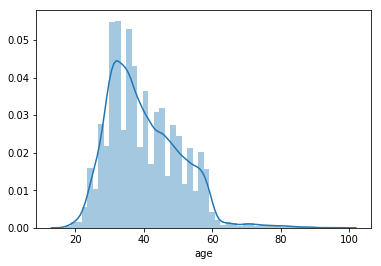

In [59]:
import seaborn as sns
sns.distplot(df1['age'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


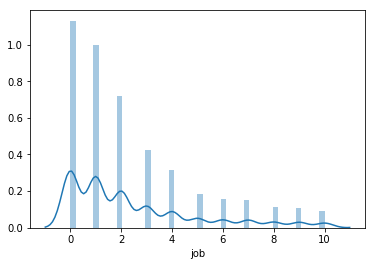

In [60]:
sns.distplot(df1['job'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


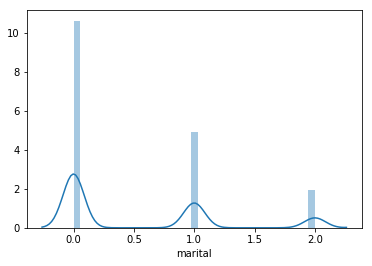

In [62]:
sns.distplot(df1['marital'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


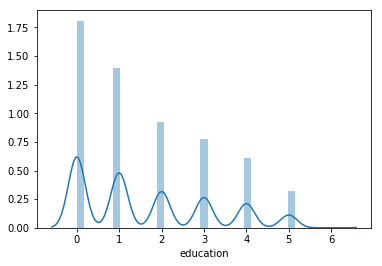

In [63]:
sns.distplot(df1['education'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


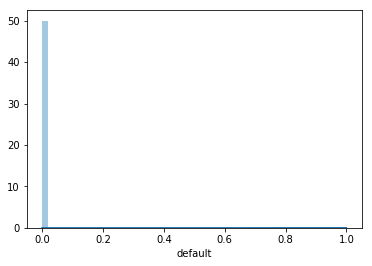

In [64]:
sns.distplot(df1['default'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


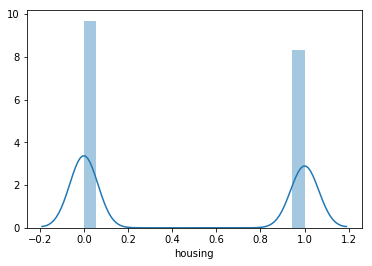

In [47]:
sns.distplot(df1['housing'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


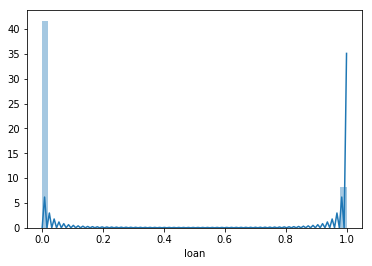

In [65]:
sns.distplot(df1['loan'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


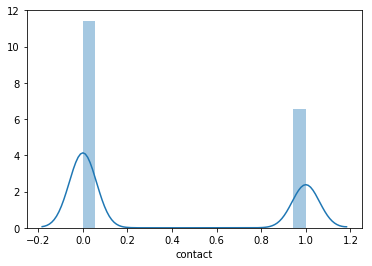

In [66]:
sns.distplot(df1['contact'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


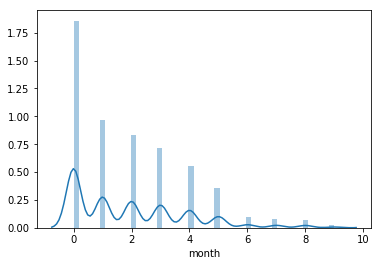

In [67]:
sns.distplot(df1['month'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


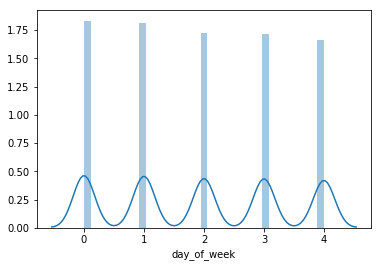

In [68]:
sns.distplot(df1['day_of_week'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


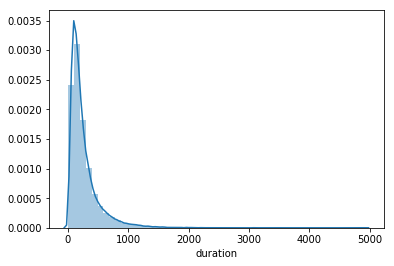

In [69]:
sns.distplot(df1['duration'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


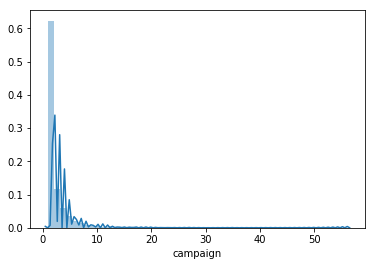

In [70]:
sns.distplot(df1['campaign'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


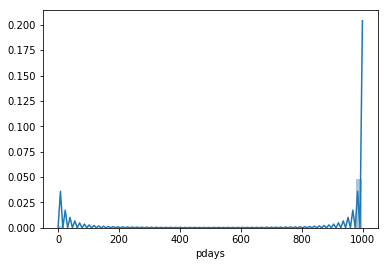

In [72]:
sns.distplot(df1['pdays'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


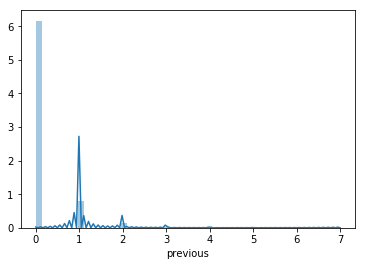

In [73]:
sns.distplot(df1['previous'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


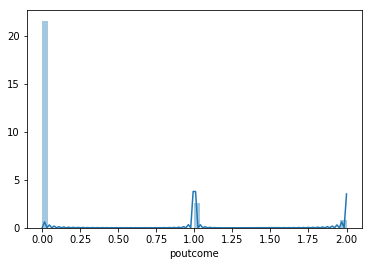

In [74]:
sns.distplot(df1['poutcome'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


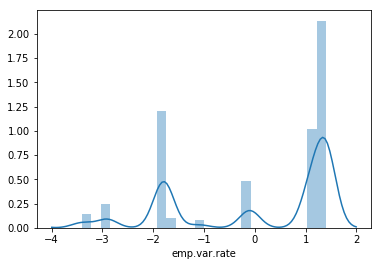

In [75]:
sns.distplot(df1['emp.var.rate'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


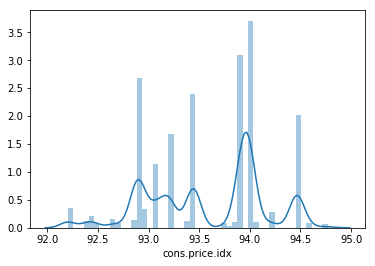

In [76]:
sns.distplot(df1['cons.price.idx'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


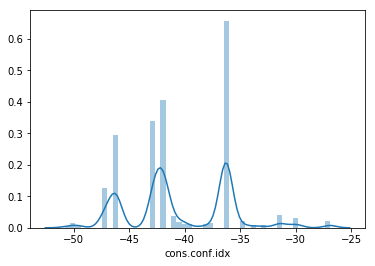

In [77]:
sns.distplot(df1['cons.conf.idx'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


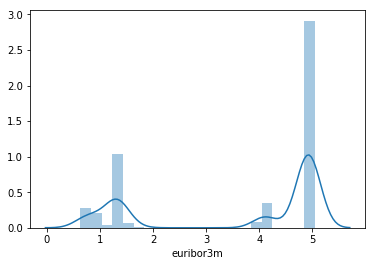

In [78]:
sns.distplot(df1['euribor3m'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


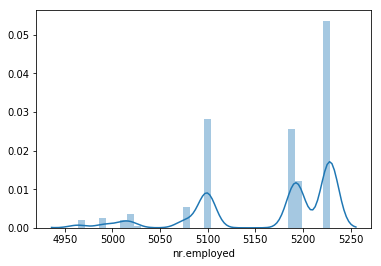

In [48]:
sns.distplot(df1['nr.employed'])

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


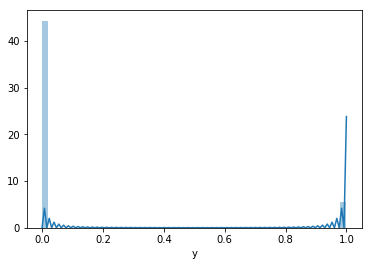

In [79]:
sns.distplot(df1['y'])

In [49]:
df1['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

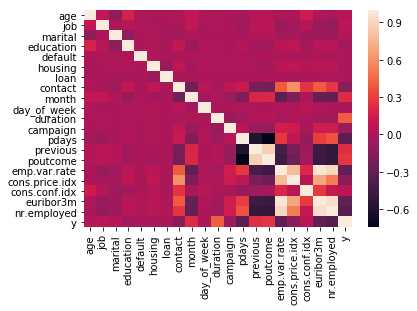

In [50]:
import seaborn as sns
corr=df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [51]:
df1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.093138,-0.116581,0.177227,0.001891,-0.004345,0.000780,0.007021,0.093110,0.016189,...,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.093138,1.000000,-0.000334,0.039653,0.006229,-0.003189,-0.008270,-0.007482,0.091163,-0.007171,...,-0.015393,-0.058682,0.057264,0.055232,-0.082824,-0.031209,0.034408,-0.075015,-0.095077,0.059513
marital,-0.116581,-0.000334,1.000000,-0.118511,-0.006258,0.014152,-0.029703,-0.043604,0.014834,-0.003126,...,0.000403,-0.016699,0.028844,0.028815,-0.047892,-0.023771,-0.051051,-0.053781,-0.049536,0.025622
education,0.177227,0.039653,-0.118511,1.000000,0.003734,0.007244,-0.002788,0.087659,-0.080927,0.007415,...,0.000432,0.032986,-0.036904,-0.036228,0.055169,0.079410,-0.031592,0.046691,0.043384,-0.041816
default,0.001891,0.006229,-0.006258,0.003734,1.000000,0.003506,-0.003808,-0.006474,0.003187,0.006333,...,-0.003803,0.001668,0.002766,0.003061,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.004345,-0.003189,0.014152,0.007244,0.003506,1.000000,-0.078626,0.079074,-0.029670,0.021087,...,0.011334,0.009788,-0.021282,-0.022769,0.057288,0.077598,0.032984,0.056705,0.043613,-0.010785
loan,0.000780,-0.008270,-0.029703,-0.002788,-0.003808,-0.078626,1.000000,-0.005452,-0.010044,0.002107,...,0.004414,0.001190,-0.000995,-0.001379,0.004741,0.000256,-0.011074,0.002630,0.006082,-0.005617
contact,0.007021,-0.007482,-0.043604,0.087659,-0.006474,0.079074,-0.005452,1.000000,-0.226851,0.052376,...,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.093110,0.091163,0.014834,-0.080927,0.003187,-0.029670,-0.010044,-0.226851,1.000000,-0.032484,...,-0.067502,-0.173904,0.189731,0.201397,-0.313826,-0.181645,-0.011543,-0.273407,-0.288111,0.222684
day_of_week,0.016189,-0.007171,-0.003126,0.007415,0.006333,0.021087,0.002107,0.052376,-0.032484,1.000000,...,0.000640,0.010015,0.002176,0.000095,0.005231,0.011271,0.040239,0.012444,0.002146,-0.003525


In [54]:
df1.shape

(41188, 21)

In [56]:
# feauture engineering
x=df1.iloc[:,0:20]
y=df1.iloc[:,20]

In [57]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,8,0,4,0,1,0,1,0,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,3,0,1,0,1,0,1,0,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,3,0,1,0,0,0,1,0,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,0,0,5,0,1,0,1,0,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,3,0,1,0,1,1,1,0,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
5,45,3,0,2,0,1,0,1,0,1,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
6,59,0,0,3,0,1,0,1,0,1,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
7,41,1,0,2,0,1,0,1,0,1,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
8,24,2,1,3,0,0,0,1,0,1,380,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
9,25,3,1,1,0,0,0,1,0,1,50,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [58]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [80]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10574,49,0,2,0,0,1,0,1,3,3,23,3,999,0,0,1.4,94.465,-41.8,4.961,5228.1
5798,30,1,0,2,0,1,1,1,0,1,535,6,999,0,0,1.1,93.994,-36.4,4.857,5191.0
26186,41,1,0,4,0,0,0,1,4,0,132,3,999,0,0,-0.1,93.200,-42.0,4.076,5195.8
8108,45,1,0,5,0,0,0,1,3,1,134,8,999,0,0,1.4,94.465,-41.8,4.865,5228.1
14637,35,1,2,2,0,1,1,0,1,3,1083,2,999,0,0,1.4,93.918,-42.7,4.961,5228.1
32134,45,2,2,0,0,1,0,0,0,4,776,1,999,0,0,-1.8,92.893,-46.2,1.313,5099.1
23329,54,0,0,1,0,0,0,0,2,2,82,2,999,0,0,1.4,93.444,-36.1,4.964,5228.1
32593,33,1,0,2,0,0,0,0,0,1,313,1,999,0,0,-1.8,92.893,-46.2,1.299,5099.1
5166,36,2,1,0,0,1,0,1,0,4,128,4,999,0,0,1.1,93.994,-36.4,4.857,5191.0
20506,35,4,0,0,0,1,0,0,2,3,186,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1


In [82]:
y_train

10574    0
5798     0
26186    0
8108     0
14637    0
32134    1
23329    0
32593    0
5166     0
20506    0
9868     0
24397    0
10336    0
1792     0
6736     0
12785    1
18003    0
32798    0
24709    0
6184     0
23274    0
34432    0
1119     0
18042    0
11844    0
7072     0
33325    0
3380     0
35610    0
32680    0
        ..
37459    0
7401     0
32823    0
486      0
18316    0
39671    0
24734    0
3347     0
39665    0
4985     0
12932    1
16578    0
38866    1
3362     0
17176    0
23367    0
8075     0
14512    0
21690    0
32781    0
9698     0
34344    0
15388    0
4492     0
37294    0
8596     1
39941    1
38958    1
482      0
12235    0
Name: y, Length: 32950, dtype: int64

In [83]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
10717,42,7,0,0,0,0,0,1,3,3,60,3,999,0,0,1.4,94.465,-41.8,4.961,5228.1
40434,47,4,0,0,0,0,0,0,2,1,145,3,3,2,2,-1.7,94.027,-38.3,0.904,4991.6
28861,25,10,0,0,0,0,1,1,5,0,127,7,999,0,0,-1.8,93.075,-47.1,1.410,5099.1
2125,41,1,0,2,0,1,0,1,0,1,457,4,999,0,0,1.1,93.994,-36.4,4.857,5191.0
28501,46,1,2,2,0,1,0,0,5,3,332,3,999,0,0,-1.8,93.075,-47.1,1.423,5099.1
25248,47,0,2,0,0,1,1,0,4,3,96,2,999,0,0,-0.1,93.200,-42.0,4.153,5195.8
29853,33,8,0,4,0,0,0,0,5,1,172,2,999,0,0,-1.8,93.075,-47.1,1.405,5099.1
26343,44,4,0,0,0,0,0,0,4,0,176,1,999,0,0,-0.1,93.200,-42.0,4.076,5195.8
39678,77,5,0,4,0,0,1,0,0,4,318,3,999,0,0,-1.8,93.876,-40.0,0.684,5008.7
1927,44,2,1,3,0,1,0,1,0,4,182,3,999,0,0,1.1,93.994,-36.4,4.855,5191.0


In [84]:
y_test

10717    0
40434    0
28861    0
2125     0
28501    0
25248    0
29853    0
26343    0
39678    0
1927     0
26220    0
4150     0
31173    0
18400    0
37106    0
32319    0
11487    0
28215    0
27097    0
41134    1
22145    0
12765    0
14478    0
19924    0
20470    0
38187    0
25326    0
21121    0
24139    0
4142     0
        ..
26642    0
17733    0
30258    0
17397    0
29723    0
32910    0
2828     0
32625    0
19103    0
13882    1
39939    1
34091    0
25033    0
40156    1
33841    0
40948    0
16571    0
22578    0
40143    1
22056    0
37864    0
33220    0
21013    0
14612    0
14346    0
38139    0
23638    0
13433    0
5874     0
14262    1
Name: y, Length: 8238, dtype: int64

In [85]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [87]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [88]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.9024035 , 0.90002731, 0.90102886])

In [89]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 1 0 ... 0 0 0]


In [90]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.604516
Recall score:18.091010
ROC score:58.800173
[[7301   36]
 [ 738  163]]


In [91]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.910843


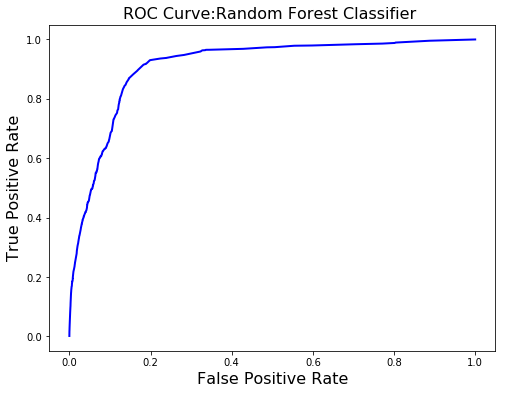

In [92]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [93]:
tp=7301
tn=163
fp=36
fn=738

In [94]:
sens=tp/(tp+fn)
sens

0.9081975370070904

In [95]:
spec=tn/(fp+tn)
spec

0.8190954773869347

In [96]:
pre=tp/(tp+fp)
pre

0.9950933624097043

# KNN CLASSIFIER

In [97]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
y_pred=clf.predict(x_test)

In [99]:
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 1]


In [100]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 1]


In [101]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.592377
Recall score:48.501665
ROC score:72.131438
[[7026  311]
 [ 464  437]]


In [102]:
probas=clf.predict_proba(x_test)
probas

array([[1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8]])

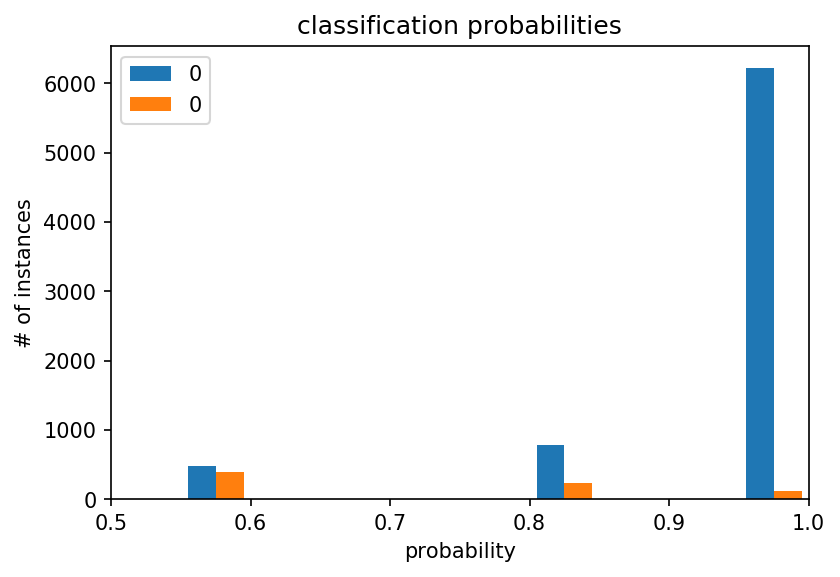

In [103]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [104]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [105]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89238893, 0.89283438, 0.89328963])

AUC Score(kNN):0.768950


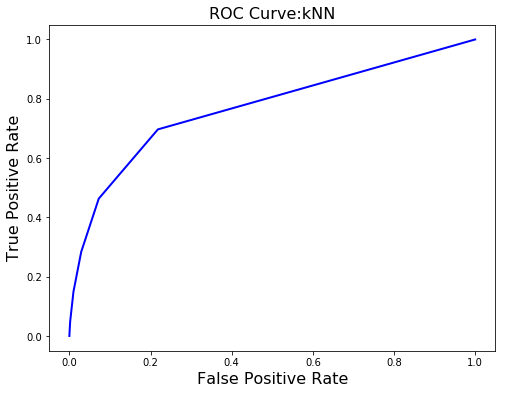

In [106]:
ROC_curve('kNN',y_train,clf_scores)

In [107]:
tp1=7026
tn1=437
fp1=311
fn1=464

In [108]:
sensk=tp1/(tp1+fn1)
sensk

0.9380507343124166

In [109]:
speck=tn1/(fp1+tn1)
speck

0.5842245989304813

In [110]:
prek=tp1/(tp1+fp1)
prek

0.9576121030393894

# logistic regreesion model

In [111]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.9087764 , 0.90576345, 0.9082218 ])

In [113]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 1 0 ... 0 0 0]


In [114]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 1]


In [115]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:91.162904
Recall score:38.512764
ROC score:68.070611
[[7163  174]
 [ 554  347]]


In [116]:
tp2=7163
tn2=347
fp2=174
fn2=554

In [117]:
sensl=tp2/(tp2+fn2)
sensl

0.9282104444732409

In [118]:
specl=tn2/(fp2+tn2)
specl

0.6660268714011516

In [119]:
precl=tp2/(tp2+fp2)
precl

0.9762845849802372

AUC Score(Logestic Regression):0.927690


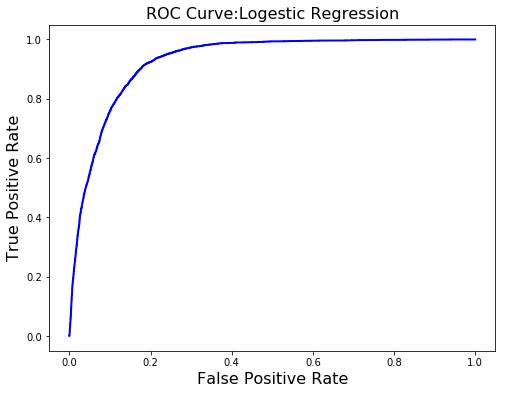

In [120]:
ROC_curve('Logestic Regression',y_train,lr_scores)

# decision tree classification

In [121]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [123]:
dtc_clf_acc

array([0.88510561, 0.88655194, 0.88955659])

In [124]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [125]:
dtc_proba

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [126]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [127]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 1]


In [129]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [130]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:89.390629


In [131]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :52.830189


In [132]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :73.355261



In [133]:
print(confusion_matrix(y_test,y_pred))

[[6888  449]
 [ 425  476]]


In [134]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [135]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33865,27,0,1,1,0,1,0,0,0,2,167,1,999,0,0,-1.8,92.893,-46.2,1.281,5099.1
31993,45,4,0,0,0,0,1,0,0,0,265,3,999,0,0,-1.8,92.893,-46.2,1.327,5099.1
5626,30,3,0,1,0,0,0,1,0,1,144,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
25063,47,4,0,0,0,1,0,0,4,3,126,2,999,0,0,-0.1,93.200,-42.0,4.153,5195.8
8805,52,4,2,0,0,0,1,1,3,0,73,1,999,0,0,1.4,94.465,-41.8,4.866,5228.1
5986,34,1,0,2,0,1,0,1,0,3,427,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
19673,50,1,0,2,0,1,0,0,2,0,524,3,999,0,0,1.4,93.444,-36.1,4.968,5228.1
6362,45,1,0,5,0,1,0,1,0,3,858,6,999,0,0,1.1,93.994,-36.4,4.857,5191.0
40732,36,4,0,0,0,0,1,0,7,2,331,1,6,4,1,-1.1,94.199,-37.5,0.876,4963.6
2000,42,7,0,0,0,0,0,1,0,1,1002,5,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [136]:
y_train

33865    0
31993    0
5626     0
25063    0
8805     0
5986     0
19673    0
6362     1
40732    1
2000     0
26481    0
19415    0
23744    0
12224    0
4958     0
6950     0
37253    0
36706    0
28889    0
723      0
26364    0
19716    0
36071    0
2212     0
21317    0
31925    0
20717    0
26237    0
40062    1
29467    0
        ..
11744    0
15173    0
33741    0
32063    0
12144    0
1625     0
39223    1
32509    0
12130    0
21523    0
5977     0
5571     0
33202    0
17840    0
27893    1
36619    1
22922    0
12247    0
29248    0
23109    0
16658    1
23898    0
28920    0
22673    0
20185    0
35140    0
14158    0
280      0
9000     0
24462    0
Name: y, Length: 37069, dtype: int64

In [137]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12084,30,6,0,2,0,1,0,1,3,4,153,2,999,0,0,1.4,94.465,-41.8,4.947,5228.1
32575,43,3,2,3,0,1,0,0,0,1,108,6,999,1,1,-1.8,92.893,-46.2,1.299,5099.1
823,31,4,1,0,0,0,0,1,0,2,254,1,999,0,0,1.1,93.994,-36.4,4.856,5191.0
37902,52,2,0,3,0,0,1,0,7,3,77,1,999,0,0,-3.4,92.379,-29.8,0.819,5017.5
26880,30,0,1,0,0,1,0,0,4,0,88,2,999,0,0,-0.1,93.200,-42.0,4.076,5195.8
14625,51,0,2,3,0,0,0,0,1,3,408,4,999,0,0,1.4,93.918,-42.7,4.961,5228.1
2794,42,0,0,2,0,0,0,1,0,2,117,6,999,0,0,1.1,93.994,-36.4,4.859,5191.0
19136,39,9,2,0,0,1,0,0,2,3,307,1,999,0,0,1.4,93.444,-36.1,4.968,5228.1
13005,28,3,0,1,0,1,0,0,1,3,96,1,999,0,0,1.4,93.918,-42.7,4.962,5228.1
8361,34,0,0,0,0,1,0,1,3,3,133,3,999,0,0,1.4,94.465,-41.8,4.864,5228.1


In [138]:
y_test

12084    0
32575    0
823      0
37902    0
26880    0
14625    0
2794     0
19136    0
13005    0
8361     0
21330    1
18191    0
1544     0
20122    0
31188    0
17652    0
12273    0
38872    0
30844    1
32722    0
34863    0
33223    0
33930    0
34901    1
11588    0
7275     0
29743    0
27788    0
29027    0
19756    0
        ..
1234     0
18911    0
9495     0
3272     0
22564    0
16582    0
22571    0
29903    0
8657     0
35370    0
30861    0
35996    0
35131    0
2013     0
3197     0
29967    1
16131    0
25393    0
15809    0
18754    0
5884     0
31022    0
19234    0
36179    0
20830    0
2471     0
33032    0
33069    0
6463     0
20266    0
Name: y, Length: 4119, dtype: int64

In [139]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# Random forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [141]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [142]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.90005665, 0.90021042, 0.90101975])

In [143]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [144]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.847293
Recall score:19.134396
ROC score:59.268285
[[3658   22]
 [ 355   84]]


In [145]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.911270


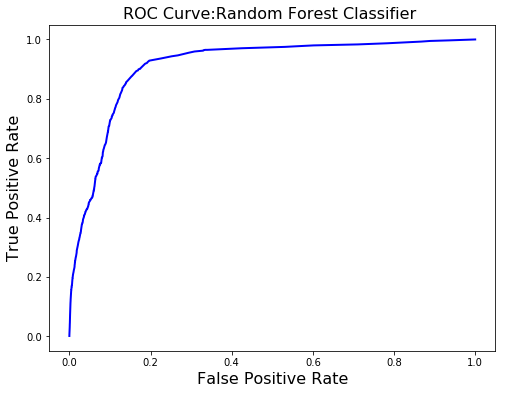

In [146]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [147]:
tp=3658
tn=84
fp=22
fn=355

In [148]:
sens=tp/(tp+fn)
sens

0.9115375031148767

In [149]:
spec=tn/(fp+tn)
spec

0.7924528301886793

In [150]:
pre=tp/(tp+fp)
pre

0.9940217391304348

# KNN CLASSIFIER

In [151]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
y_pred=clf.predict(x_test)

In [153]:
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [154]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [155]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.798738
Recall score:48.974943
ROC score:72.381493
[[3525  155]
 [ 224  215]]


In [156]:
probas=clf.predict_proba(x_test)
probas

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

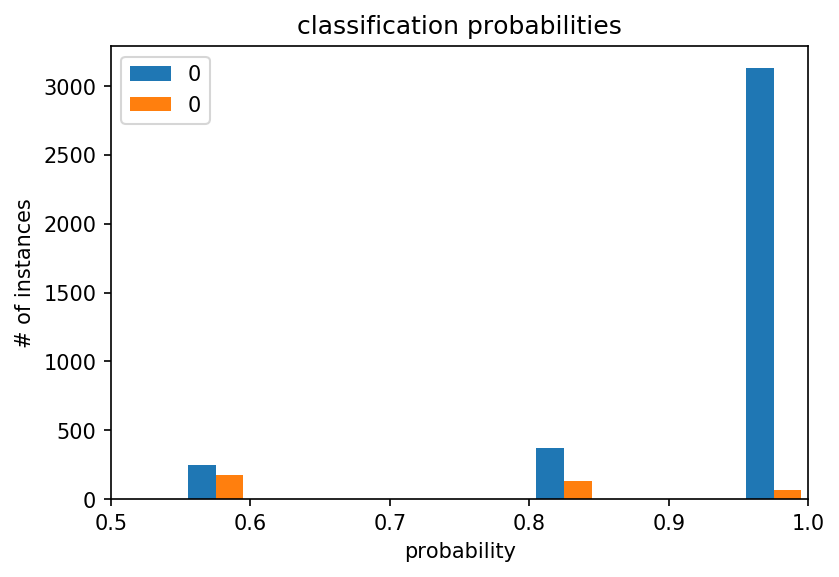

In [157]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [158]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [159]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89390629, 0.89592101, 0.88912269])

AUC Score(kNN):0.770124


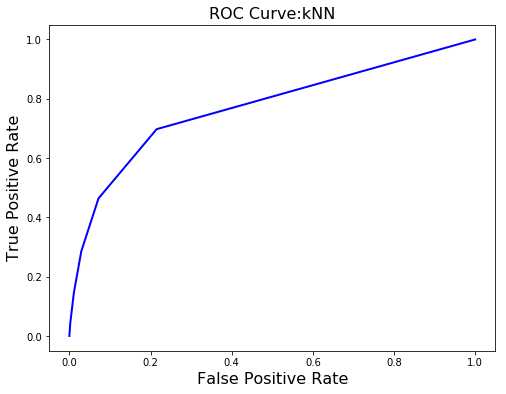

In [160]:
ROC_curve('kNN',y_train,clf_scores)

In [161]:
tp1=3525
tn1=215
fp1=155
fn1=224

In [162]:
sensk=tp1/(tp1+fn1)
sensk

0.9402507335289411

In [163]:
speck=tn1/(fp1+tn1)
speck

0.581081081081081

In [164]:
prek=tp1/(tp1+fp1)
prek

0.9578804347826086

# logistic regression model

In [165]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.90717812, 0.90806086, 0.90806086])

In [167]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [168]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [169]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:91.381403
Recall score:42.141230
ROC score:69.698332
[[3579  101]
 [ 254  185]]


In [170]:
tp2=3579
tn2=185
fp2=101
fn2=254

In [171]:
sensl=tp2/(tp2+fn2)
sensl

0.9337333681189669

In [172]:
specl=tn2/(fp2+tn2)
specl

0.6468531468531469

In [173]:
precl=tp2/(tp2+fp2)
precl

0.972554347826087

AUC Score(Logestic Regression):0.928141


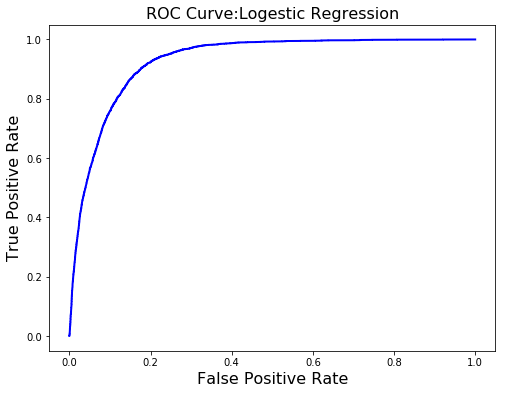

In [174]:
ROC_curve('Logestic Regression',y_train,lr_scores)

# DECISION TREE CLASSIFICATION

In [175]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [177]:
dtc_clf_acc

array([0.88888889, 0.89211719, 0.89049854])

In [178]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [179]:
dtc_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [180]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [181]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [183]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [184]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:89.390629


In [185]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :50.797267


In [186]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :72.395916



In [187]:
print(confusion_matrix(y_test,y_pred))

[[3459  221]
 [ 216  223]]


In [188]:
from sklearn import cross_validation,neighbors
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [189]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5490,40,2,0,3,0,0,0,1,0,1,373,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0
13002,26,4,1,0,0,1,0,0,1,3,517,2,999,0,0,1.4,93.918,-42.7,4.962,5228.1
5638,29,10,1,1,0,1,1,1,0,1,630,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
22222,49,1,0,5,0,1,0,0,2,0,139,2,999,0,0,1.4,93.444,-36.1,4.963,5228.1
41174,62,5,0,0,0,0,0,0,4,0,208,1,1,6,2,-1.1,94.767,-50.8,1.031,4963.6
6718,34,0,0,1,0,1,0,1,0,2,357,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
865,33,1,0,1,0,0,0,1,0,2,233,1,999,0,0,1.1,93.994,-36.4,4.856,5191.0
13545,35,0,1,0,0,1,0,0,1,0,250,1,999,0,0,1.4,93.918,-42.7,4.963,5228.1
11722,30,1,0,2,0,0,0,1,3,4,12,14,999,0,0,1.4,94.465,-41.8,4.959,5228.1
18169,32,1,0,1,0,1,0,0,1,2,259,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1


In [190]:
y_train

5490     0
13002    0
5638     1
22222    0
41174    1
6718     0
865      0
13545    0
11722    0
18169    0
24211    1
11170    0
556      1
32183    0
40971    0
11938    0
36028    0
16017    0
31140    0
15445    0
28509    0
19589    0
36319    0
17110    0
28550    0
16328    0
7195     0
17054    0
18611    0
355      0
        ..
23533    0
7276     0
26745    0
11690    1
9203     1
15123    0
35910    0
12391    0
32517    0
38315    0
15491    0
16036    0
13910    0
13076    0
5913     0
23895    0
19545    0
8829     0
25997    0
30435    0
22737    0
5062     0
22274    0
12461    1
21219    0
31647    0
7946     0
15745    0
8282     0
5907     0
Name: y, Length: 30891, dtype: int64

In [191]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
30474,26,10,1,0,0,1,1,0,0,1,90,2,999,0,0,-1.8,92.893,-46.2,1.354,5099.1
8261,57,1,0,1,0,1,0,1,3,3,171,3,999,0,0,1.4,94.465,-41.8,4.864,5228.1
17641,45,7,2,0,0,0,0,0,1,1,168,4,999,0,0,1.4,93.918,-42.7,4.962,5228.1
21704,32,0,1,0,0,0,1,0,2,3,221,8,999,0,0,1.4,93.444,-36.1,4.963,5228.1
36455,58,5,2,1,0,0,0,0,3,3,145,2,999,0,0,-2.9,92.963,-40.8,1.262,5076.2
26174,31,6,0,2,0,1,0,0,4,2,558,3,999,0,0,-0.1,93.200,-42.0,4.120,5195.8
33061,35,0,1,0,0,0,1,0,0,1,439,2,999,0,0,-1.8,92.893,-46.2,1.299,5099.1
9762,37,0,0,1,0,1,0,1,3,1,250,2,999,0,0,1.4,94.465,-41.8,4.961,5228.1
14361,30,1,0,2,0,0,0,0,1,1,149,3,999,0,0,1.4,93.918,-42.7,4.962,5228.1
2189,56,0,0,2,0,1,0,1,0,1,10,11,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [192]:
y_test

30474    0
8261     0
17641    0
21704    0
36455    0
26174    0
33061    0
9762     0
14361    0
2189     0
24315    0
14661    0
10857    0
28668    0
21718    0
13491    0
18794    0
10603    0
28958    0
21974    0
26126    0
3122     0
6042     0
12772    0
9543     0
6559     0
39381    1
22937    0
1813     0
40407    1
        ..
4600     0
19983    0
3677     1
18418    0
12077    0
15278    0
23665    0
23887    0
11493    0
29749    0
17633    0
14632    0
33905    0
22705    0
6274     0
14894    0
38267    0
34686    0
23368    0
15765    0
6318     0
22167    0
14397    0
4569     0
30684    0
23601    0
11111    0
20600    0
28807    0
1847     0
Name: y, Length: 10297, dtype: int64

In [193]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.48148148, 0.8       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.3       , 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.2       , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.5       , 0.        , ..., 0.        , 0.08932215,
        0.        ]])

# Random forest

In [194]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_cif=rmf.fit(x_train,y_train)

In [195]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [196]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rmf_cif_acc=cross_val_score(rmf_cif,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
rmf_proba=cross_val_predict(rmf_cif,x_train_std,y_train,cv=3,method='predict_proba')
rmf_cif_score=rmf_proba[:,1]
rmf_cif_acc

array([0.9018256 , 0.90181606, 0.90112665])

In [197]:
y_pred=rmf_cif.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [198]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.269010
Recall score:17.616126
ROC score:58.469487
[[9094   62]
 [ 940  201]]


In [199]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title,y_train,scores,label=None):
    #calculate the ROC score
    fpr,tpr,thresholds=roc_curve(y_train,scores)
    print('AUC Score({}):{:2f}'.format(title,roc_auc_score(y_train,scores)))
    #plot the roc curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,linewidth=2,label=label,color='b')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.title('ROC Curve:{}'.format(title),fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier ):0.915302


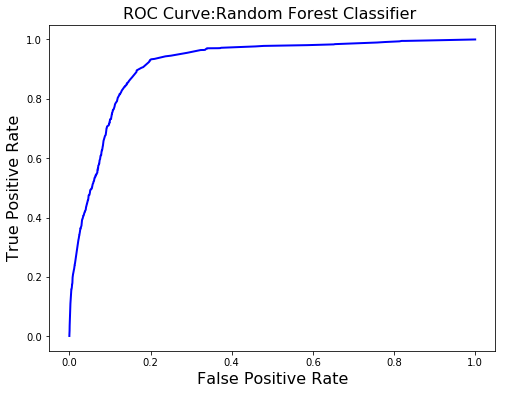

In [200]:
ROC_curve('Random Forest Classifier ',y_train,rmf_cif_score)

In [201]:
tp=9046
tn=201
fp=62
fn=201

In [202]:
sens=tp/(tp+fn)
sens

0.9782632205039472

In [203]:
spec=tn/(fp+tn)
spec

0.7642585551330798

In [204]:
pre=tp/(tp+fp)
pre

0.9931927975406236

# KNN CLASSIFIER

In [205]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [206]:
y_pred=clf.predict(x_test)

In [207]:
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [208]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [209]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.725454
Recall score:48.641543
ROC score:72.305699
[[8787  369]
 [ 586  555]]


In [210]:
probas=clf.predict_proba(x_test)
probas

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2]])

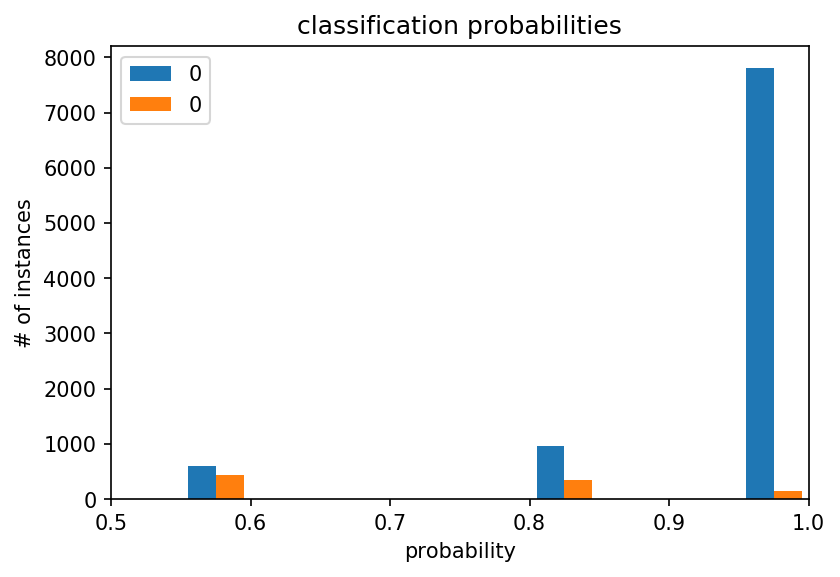

In [211]:
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title("classification probabilities")
plt.xlabel('probability')
plt.ylabel('# of instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()

In [212]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)

In [213]:
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class
clf_acc

array([0.89512527, 0.89394969, 0.89287102])

AUC Score(kNN):0.766988


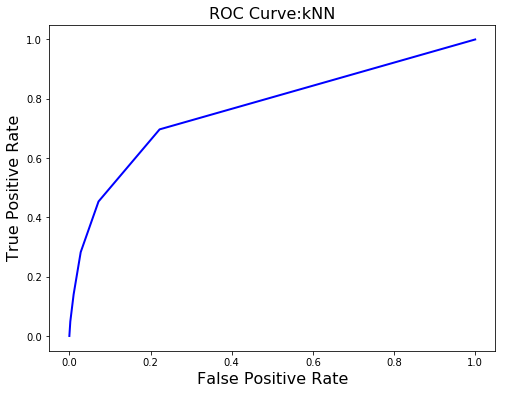

In [214]:
ROC_curve('kNN',y_train,clf_scores)

In [215]:
tp1=8787
tn1=555
fp1=369
fn1=586

In [216]:
sensk=tp1/(tp1+fn1)
sensk

0.9374799957324229

In [217]:
speck=tn1/(fp1+tn1)
speck

0.6006493506493507

In [218]:
prek=tp1/(tp1+fp1)
prek

0.9596985583224116

# logistic regression model

In [219]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.90755487, 0.91045936, 0.90646853])

In [221]:
y_pred=lr.predict(x_test)
print("\n Predict test values:")
print(y_pred)


 Predict test values:
[0 0 0 ... 0 0 0]


In [222]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [223]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"%(recall_score(y_test,y_pred)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


Accuracy score:90.822570
Recall score:38.475022
ROC score:67.910512
[[8913  243]
 [ 702  439]]


In [224]:
tp2=8913
tn2=439
fp2=243
fn2=702

In [225]:
sensl=tp2/(tp2+fn2)
sensl

0.9269890795631825

In [226]:
specl=tn2/(fp2+tn2)
specl

0.6436950146627566

In [227]:
precl=tp2/(tp2+fp2)
precl

0.9734600262123198

AUC Score(Logestic Regression):0.928673


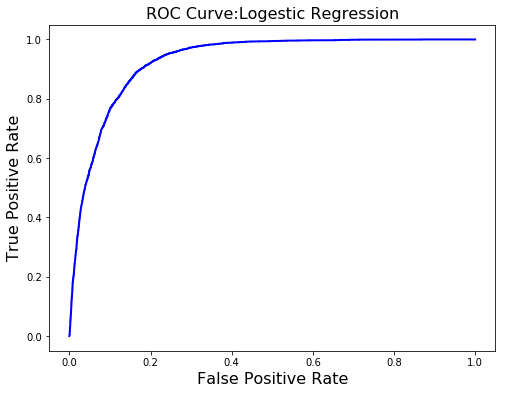

In [228]:
ROC_curve('Logestic Regression',y_train,lr_scores)

# DECISION TREE CLASSIFIER

In [229]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [230]:
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=1)

In [231]:
dtc_clf_acc

array([0.88774519, 0.88831699, 0.88014763])

In [232]:
dtc_proba = cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [233]:
dtc_proba

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [234]:
# predit on test data
y_pred=dtc_clf.predict(x_test)

In [235]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [236]:
print("y")
print(y_test.values)

y
[0 0 0 ... 0 0 0]


In [237]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [238]:
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))


Accuracy score:89.152180


In [239]:
print("Recall score :%f"%(recall_score(y_test,y_pred)*100))

Recall score :52.059597


In [240]:
print("ROC score :%f\n"%(roc_auc_score(y_test,y_pred)*100))

ROC score :72.917085



In [241]:
print(confusion_matrix(y_test,y_pred))

[[8586  570]
 [ 547  594]]
